---Sentiment analysis---
The script conducts sentiment analysis of news articles in the MIND dataset. It takes the PerSenT dataset for training, where articles are marked as postive, negative, or neutral, and applies this classification to the MIND articles. The classification is based on OpenAI's embeddings (text-embedding-ada-002). 


In [1]:
# imports
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
news = pd.read_csv("data_embeddings/news_emb_test.csv") #document with user interactions
news.head()

,ID,Category,SubCategory,Content,Content_emb
0,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"[-0.0297758337110281, -0.014837449416518211, 0..."
1,N9721,health,nutrition,"50 Foods You Should Never Eat, According to He...","[0.012758416123688221, -0.009777242317795753, ..."
2,N39758,health,nutrition,25 Biggest Grocery Store Mistakes Making You G...,"[0.005077139008790255, -0.012759401462972164, ..."
3,N3574,autos,autosnews,Ford Bronco Test Mule Spotted Flexing Its Musc...,"[-0.03402266278862953, -0.02521878108382225, 0..."
4,N42474,news,newsbusiness,Trump's Trustbusters Bring Microsoft Lessons t...,"[-0.005269751418381929, -0.0184138435870409, 0..."


In [3]:
# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis function to the specified column
news['Sentiment'] = news['Content'].apply(analyze_sentiment)

# Display the DataFrame with the new sentiment analysis column
news.head()


,ID,Category,SubCategory,Content,Content_emb,Sentiment
0,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"[-0.0297758337110281, -0.014837449416518211, 0...",Neutral
1,N9721,health,nutrition,"50 Foods You Should Never Eat, According to He...","[0.012758416123688221, -0.009777242317795753, ...",Negative
2,N39758,health,nutrition,25 Biggest Grocery Store Mistakes Making You G...,"[0.005077139008790255, -0.012759401462972164, ...",Negative
3,N3574,autos,autosnews,Ford Bronco Test Mule Spotted Flexing Its Musc...,"[-0.03402266278862953, -0.02521878108382225, 0...",Negative
4,N42474,news,newsbusiness,Trump's Trustbusters Bring Microsoft Lessons t...,"[-0.005269751418381929, -0.0184138435870409, 0...",Neutral


In [4]:
#news.to_csv("sentiment_test.csv")

Evaluation

In [5]:
news = news.drop(['Content_emb'], axis=1)
news.head()


,ID,Category,SubCategory,Content,Sentiment
0,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,Neutral
1,N9721,health,nutrition,"50 Foods You Should Never Eat, According to He...",Negative
2,N39758,health,nutrition,25 Biggest Grocery Store Mistakes Making You G...,Negative
3,N3574,autos,autosnews,Ford Bronco Test Mule Spotted Flexing Its Musc...,Negative
4,N42474,news,newsbusiness,Trump's Trustbusters Bring Microsoft Lessons t...,Neutral


In [6]:
behaviors = pd.read_csv("MIND/behaviors_testdataset.csv", sep=';', header=None)
behaviors.columns =['User', 'Time', 'ID', 'Impressions'] 
behaviors = behaviors.drop(['Time', 'Impressions'], axis=1)
behaviors.head()

,User,ID
0,U13000,N42782 N18445 N49749
1,U14000,N9721 N61358 N11360 N64593 N9900 N46688
2,U15000,N42474 N41013 N45970 N4015 N56461 N11161 N31633
3,U13740,N55189 N42782 N34694 N45794 N18445 N63302 N104...
4,U91836,N31739 N6072 N63045 N23979 N35656 N43353 N8129...


In [7]:
#pd.read_csv("content_recommendations/" + user_id + "_cont.csv")
pd.read_csv("content_recommendations/U13000_cont.csv")

,ID,distance
0,N51188,0.116120
1,N62846,0.141740
2,N12603,0.147599
3,N41777,0.157279
4,N56541,0.159829
...,...,...
1423,N31050,0.323669
1424,N9475,0.324238
1425,N30253,0.327910
1426,N54274,0.330111


In [8]:
def analyze_sentiments(news_df, behaviors_df):
    # Create a dictionary to store sentiments for each ID
    id_sentiments = {}

    # Iterate through rows in the news dataframe
    for index, row in news_df.iterrows():
        # Split the IDs in the 'Content' column
        ids = row['ID'].split()

        # Store sentiment for each ID in the dictionary
        for news_id in ids:
            id_sentiments[news_id] = row['Sentiment']

    # Create a new dataframe to store the results
    result_df = behaviors_df.copy()

    # Initialize columns for sentiments
    result_df['Negative'] = 0
    result_df['Positive'] = 0
    result_df['Neutral'] = 0

    # Iterate through rows in the behaviors dataframe
    for index, row in result_df.iterrows():
        # Split the IDs in the 'ID' column
        ids = row['ID'].split()

        # Count sentiments for each ID and update the result dataframe
        for behavior_id in ids:
            sentiment = id_sentiments.get(behavior_id, 'Neutral')  # Default to 'Neutral'
            result_df.at[index, sentiment] += 1

    return result_df


In [20]:
result_df1 = analyze_sentiments(news, behaviors)
result_df1.head()
#result_df1.to_csv('sentiment_counted.csv', index=None)

In [10]:
import os

def analyze_sentiments_recommended(news_df, behaviors_df, n):
    # Create a dictionary to store sentiments for each ID
    id_sentiments = {}

    # Iterate through rows in the news dataframe
    for index, row in news_df.iterrows():
        # Split the IDs in the 'Content' column
        ids = row['ID'].split()

        # Store sentiment for each ID in the dictionary
        for news_id in ids:
            id_sentiments[news_id] = row['Sentiment']

    # Create a new dataframe to store the results
    result_df = behaviors_df.copy()

    # Initialize columns for recommended sentiments
    result_df['Negative_recommended'] = 0
    result_df['Positive_recommended'] = 0
    result_df['Neutral_recommended'] = 0

    # Iterate through rows in the behaviors dataframe
    for index, row in result_df.iterrows():
        user_id = row['User']
        recommendations_file = f'collab_recommendations/{user_id}_collab.csv'

        # Check if the recommendations file exists
        if os.path.exists(recommendations_file):
            # Read the content recommendations file
            recommendations_df = pd.read_csv(recommendations_file)

            # Take the top n recommendations
            top_n_recommendations = recommendations_df.head(n)

            # Count sentiments for each recommended ID and update the result dataframe
            for recommended_id in top_n_recommendations['ID']:
                sentiment = id_sentiments.get(recommended_id, 'Neutral')  # Default to 'Neutral'
                result_df.at[index, f'{sentiment}_recommended'] += 1

    return result_df



In [11]:
# Assuming you want to get the top 3 recommendations for each user
n_recommendations = 10

result_df = analyze_sentiments_recommended(news, result_df1, n_recommendations)
result_df.head()

,User,ID,Negative,Positive,Neutral,Negative_recommended,Positive_recommended,Neutral_recommended
0,U13000,N42782 N18445 N49749,1,2,0,3,6,1
1,U14000,N9721 N61358 N11360 N64593 N9900 N46688,2,3,1,3,3,4
2,U15000,N42474 N41013 N45970 N4015 N56461 N11161 N31633,1,5,1,8,2,0
3,U13740,N55189 N42782 N34694 N45794 N18445 N63302 N104...,1,8,0,1,9,0
4,U91836,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,33,36,13,5,4,1


In [12]:
import pandas as pd

# Assume df_combined is your combined dataframe with sentiment columns
# If not, replace df_combined with the actual dataframe variable
# You might want to replace NaN values with 0 if there are missing values

correlation_matrix = result_df[['Negative', 'Positive', 'Neutral', 'Negative_recommended', 'Positive_recommended', 'Neutral_recommended']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Extract specific correlation values
correlation_negative_negative_recommended = correlation_matrix.loc['Negative', 'Negative_recommended']
correlation_positive_positive_recommended = correlation_matrix.loc['Positive', 'Positive_recommended']
correlation_neutral_neutral_recommended = correlation_matrix.loc['Neutral', 'Neutral_recommended']

print(f"\nCorrelation (Negative - Negative_recommended): {correlation_negative_negative_recommended}")
print(f"Correlation (Positive - Positive_recommended): {correlation_positive_positive_recommended}")
print(f"Correlation (Neutral - Neutral_recommended): {correlation_neutral_neutral_recommended}")


Correlation Matrix:
                      Negative  Positive   Neutral  Negative_recommended  \
Negative              1.000000  0.798798  0.764662             -0.105132   
Positive              0.798798  1.000000  0.919823             -0.207785   
Neutral               0.764662  0.919823  1.000000             -0.022453   
Negative_recommended -0.105132 -0.207785 -0.022453              1.000000   
Positive_recommended  0.208112  0.345342  0.140425             -0.769639   
Neutral_recommended  -0.147814 -0.195783 -0.171749             -0.361110   

                      Positive_recommended  Neutral_recommended  
Negative                          0.208112            -0.147814  
Positive                          0.345342            -0.195783  
Neutral                           0.140425            -0.171749  
Negative_recommended             -0.769639            -0.361110  
Positive_recommended              1.000000            -0.317472  
Neutral_recommended              -0.317472         

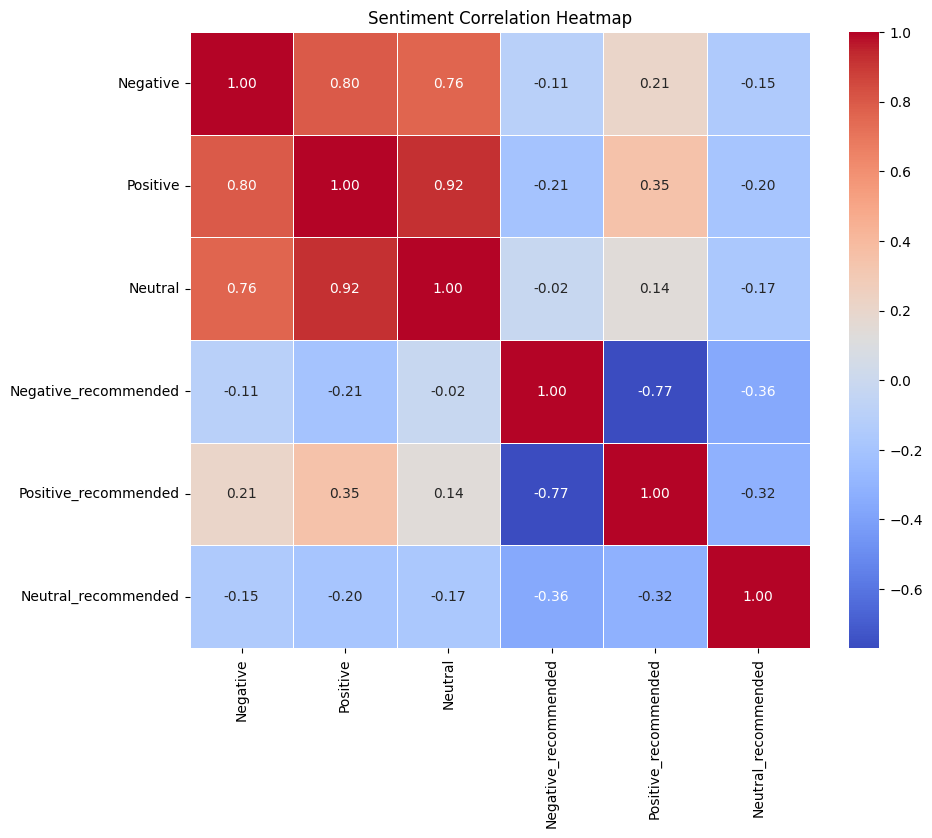

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df_combined is your combined dataframe with sentiment columns
# If not, replace df_combined with the actual dataframe variable
# You might want to replace NaN values with 0 if there are missing values

correlation_matrix = result_df[['Negative', 'Positive', 'Neutral', 'Negative_recommended', 'Positive_recommended', 'Neutral_recommended']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Sentiment Correlation Heatmap")
plt.show()


In [14]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau

# Assume df_combined is your combined dataframe with sentiment columns
# If not, replace df_combined with the actual dataframe variable
# You might want to replace NaN values with 0 if there are missing values

# Extract sentiment columns for correlation analysis
sentiment_cols = ['Negative', 'Positive', 'Neutral']
recommended_cols = ['Negative_recommended', 'Positive_recommended', 'Neutral_recommended']

# Calculate correlation matrix
correlation_matrix = result_df[sentiment_cols + recommended_cols].corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Perform correlation tests
for sentiment_col in sentiment_cols:
    for recommended_col in recommended_cols:
        correlation, p_value = pearsonr(result_df[sentiment_col], result_df[recommended_col])
        print(f"\nCorrelation test between {sentiment_col} and {recommended_col}:")
        print(f"Pearson correlation: {correlation:.4f}")
        print(f"P-value: {p_value:.4f}")

        correlation, p_value = spearmanr(result_df[sentiment_col], result_df[recommended_col])
        print(f"Spearman correlation: {correlation:.4f}")
        print(f"P-value: {p_value:.4f}")

        correlation, p_value = kendalltau(result_df[sentiment_col], result_df[recommended_col])
        print(f"Kendall correlation: {correlation:.4f}")
        print(f"P-value: {p_value:.4f}")


Correlation Matrix:
                      Negative  Positive   Neutral  Negative_recommended  \
Negative              1.000000  0.798798  0.764662             -0.105132   
Positive              0.798798  1.000000  0.919823             -0.207785   
Neutral               0.764662  0.919823  1.000000             -0.022453   
Negative_recommended -0.105132 -0.207785 -0.022453              1.000000   
Positive_recommended  0.208112  0.345342  0.140425             -0.769639   
Neutral_recommended  -0.147814 -0.195783 -0.171749             -0.361110   

                      Positive_recommended  Neutral_recommended  
Negative                          0.208112            -0.147814  
Positive                          0.345342            -0.195783  
Neutral                           0.140425            -0.171749  
Negative_recommended             -0.769639            -0.361110  
Positive_recommended              1.000000            -0.317472  
Neutral_recommended              -0.317472         

Plots

In [15]:

def generate_user_graphs(user_id, behaviors_df, news_df):
    # Get the list of articles read by the user
    user_articles = behaviors_df[behaviors_df['User'] == user_id]['ID'].str.split().explode().tolist()

    # Filter news_df based on user's articles
    user_news_df = news_df[news_df['ID'].isin(user_articles)]

    # Plot Category distribution
    category_counts = user_news_df['Category'].value_counts()
    plt.figure(figsize=(10, 5))
    category_counts.plot(kind='bar', color='skyblue')
    plt.title('Category Distribution for User {}'.format(user_id))
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()

    # Plot SubCategory distribution
    subcategory_counts = user_news_df['SubCategory'].value_counts()
    plt.figure(figsize=(10, 5))
    subcategory_counts.plot(kind='bar', color='lightcoral')
    plt.title('SubCategory Distribution for User {}'.format(user_id))
    plt.xlabel('SubCategory')
    plt.ylabel('Count')
    plt.show()

    # Plot Sentiment distribution
    sentiment_counts = user_news_df['Sentiment'].value_counts()
    plt.figure(figsize=(8, 5))
    sentiment_counts.plot(kind='bar', color='lightgreen')
    plt.title('Sentiment Distribution for User {}'.format(user_id))
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()


In [16]:

def generate_recommendation_graphs(n, user_id, news_df):
    recommendation_df = pd.read_csv("content_recommendations/" + user_id + "_cont.csv")
    # Take the first n rows from the recommendation dataframe
    top_n_recommendations = recommendation_df.head(n)

    # Extract the IDs from the recommendation dataframe
    recommended_ids = top_n_recommendations['ID'].tolist()

    # Filter news_df based on recommended IDs
    recommended_news_df = news_df[news_df['ID'].isin(recommended_ids)]

    # Plot Category distribution
    category_counts = recommended_news_df['Category'].value_counts()
    plt.figure(figsize=(10, 5))
    category_counts.plot(kind='bar', color='skyblue')
    plt.title('Category Distribution for Top {} Recommendations'.format(n))
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()

    # Plot SubCategory distribution
    subcategory_counts = recommended_news_df['SubCategory'].value_counts()
    plt.figure(figsize=(10, 5))
    subcategory_counts.plot(kind='bar', color='lightcoral')
    plt.title('SubCategory Distribution for Top {} Recommendations'.format(n))
    plt.xlabel('SubCategory')
    plt.ylabel('Count')
    plt.show()

    # Plot Sentiment distribution
    sentiment_counts = recommended_news_df['Sentiment'].value_counts()
    plt.figure(figsize=(8, 5))
    sentiment_counts.plot(kind='bar', color='lightgreen')
    plt.title('Sentiment Distribution for Top {} Recommendations'.format(n))
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()


In [17]:
#user = "U91836"
user = "U1111"

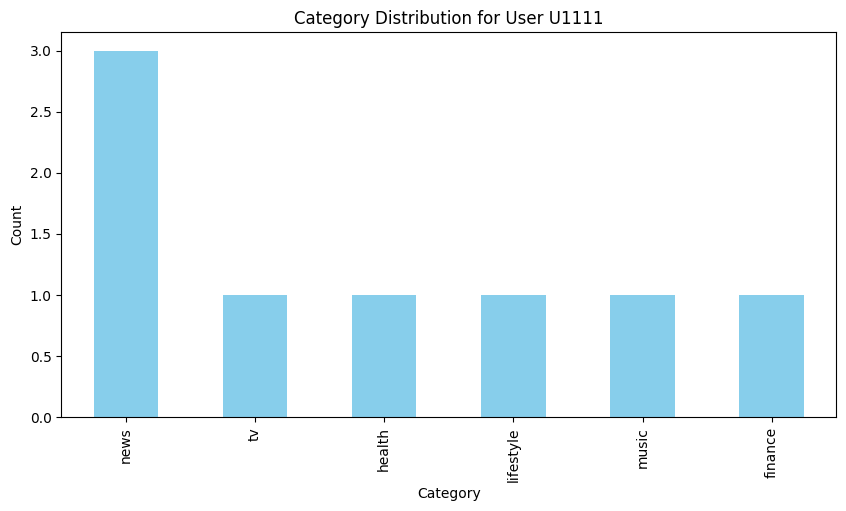

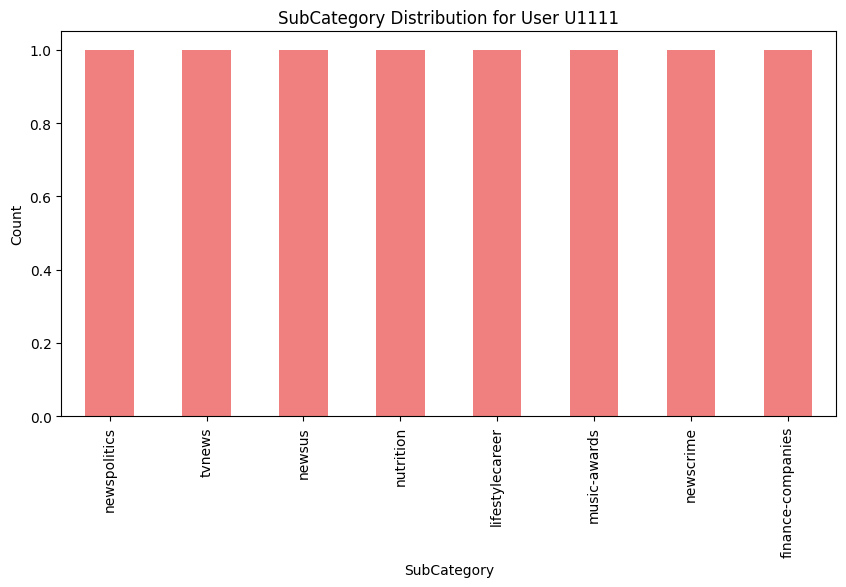

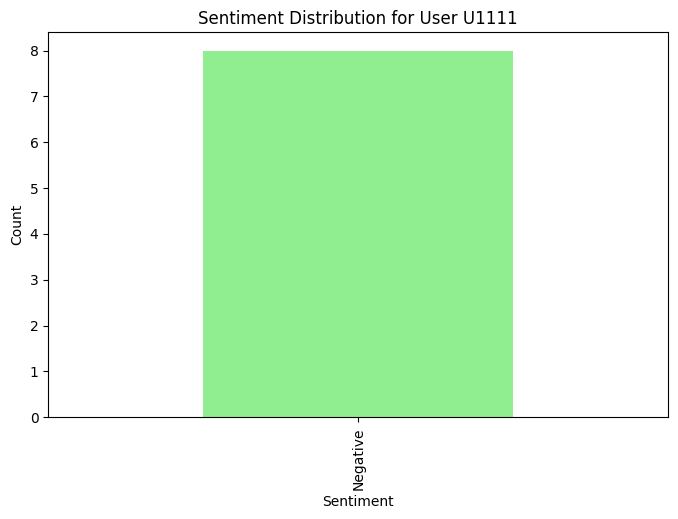

In [18]:
generate_user_graphs(user, behaviors, news)

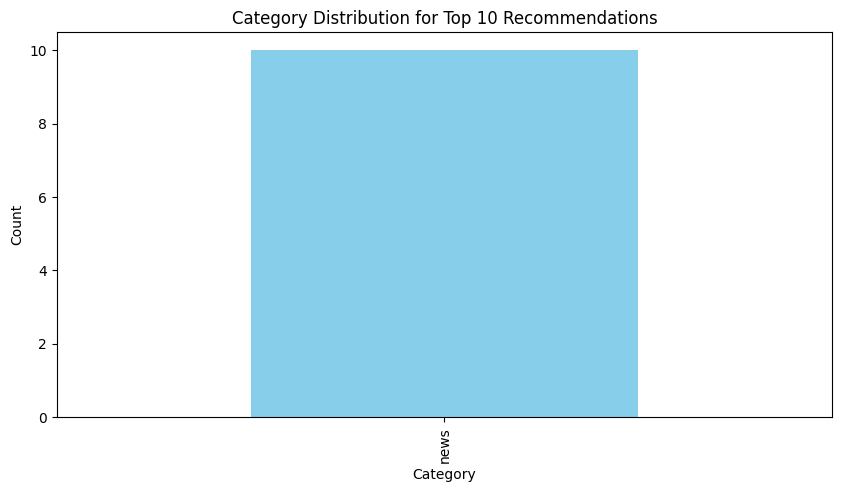

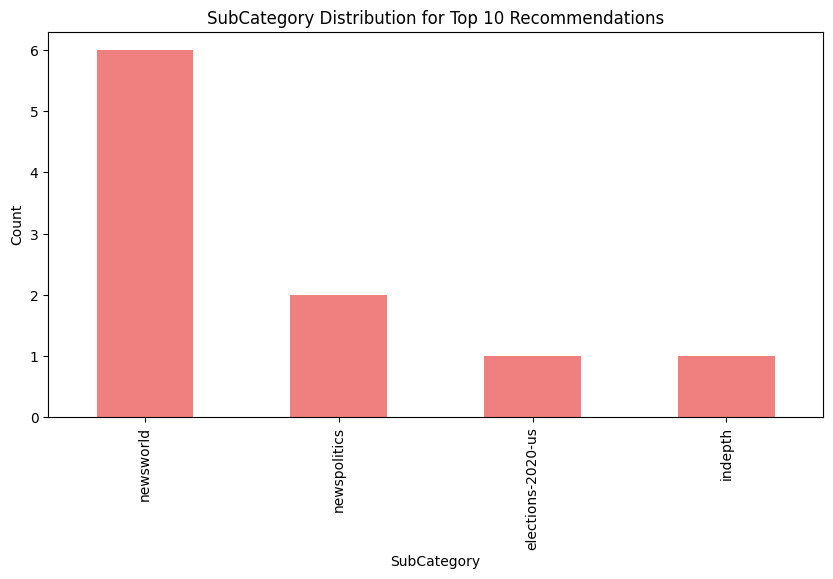

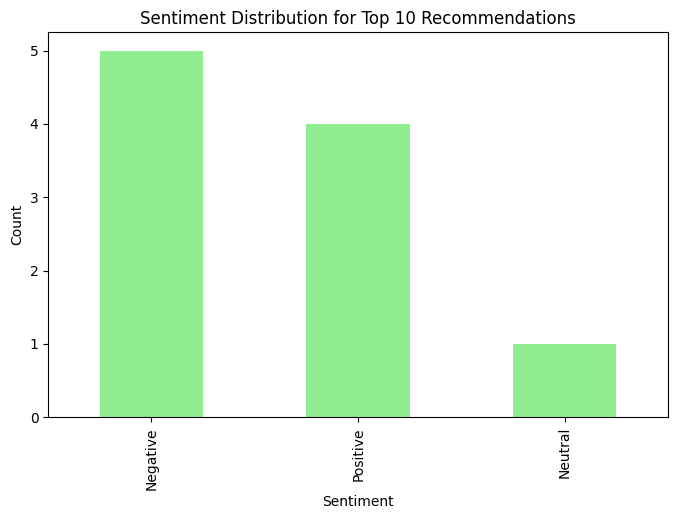

In [19]:
generate_recommendation_graphs(10, user, news)